In [28]:
# from config import access_token_omdb3, access_token_tmdb
import time
import requests
import json
import pandas as pd
import ast
import numpy as np
from datetime import datetime
import re
import sqlite3
import matplotlib.pyplot as plt
%matplotlib notebook

### Obtain List of Movie Titles and Prepare for API ###

In [4]:
# read Rotten Tomatoes csv file data to pandas dataframe
df = pd.read_csv('rotten_tomatoes.csv')

# pull the movie titles from the pandas dataframe into a list
movies_titles = df['Movie Title'].tolist()

In [6]:
# add '+' to movie titles for API query
movies = [movie.replace(' ','+') for movie in movies_titles]

['Chicken+Run',
 'The+Taste+of+Others+(Le+goût+des+autres)',
 'The+Life+and+Times+of+Hank+Greenberg',
 'Yi+Yi',
 'You+Can+Count+On+Me',
 'Memento',
 'Best+in+Show',
 'Traffic',
 'Croupier',
 'High+Fidelity',
 'Dark+Days',
 'Not+One+Less',
 'The+Filth+and+the+Fury',
 'Almost+Famous',
 'Cast+Away',
 'Panic',
 'The+Widow+of+Saint-Pierre+(The+Widow+of+St.+Pierre)+(La+veuve+de+Saint-Pierre)',
 'Aimée+&+Jaguar',
 'Sexy+Beast',
 "Exorcist:+The+Version+You've+Never+Seen",
 'Girlfight',
 'State+and+Main',
 "The+Emperor's+New+Groove",
 'Meet+the+Parents',
 'Erin+Brockovich',
 'Billy+Elliot',
 'The+Original+Kings+of+Comedy',
 'Nico+and+Dani+(Krámpack)',
 'Battle+Royale',
 'Nurse+Betty',
 'X-Men',
 'Thirteen+Days',
 'Chunhyangdyun',
 'Shadow+of+the+Vampire',
 'Chuck+&+Buck',
 'Wonder+Boys',
 'George+Washington',
 'Merci+pour+le+chocolat',
 'Ghost+Dog+-+The+Way+of+the+Samurai',
 'Love+and+Basketball',
 'Pollock',
 'Fantasia+2000',
 'The+House+of+Mirth',
 'Lakeboat',
 'Requiem+for+a+Dream',
 'Shangh

In [7]:
# use regex to remove the content between the parantheses to create the final movie titles query list
movies_search = []
for movie in movies:
    movies_search.append(re.sub(r" ?\([^)]+\)", "", movie))

1900

### Make API Calls ###

In [29]:
# test omdb call with one ping first
def omdb_call():
    
    url = 'https://www.omdbapi.com/'
    
    params = {'t': 'Chicken+Run',
                    'type': 'movie',
                    'plot': 'short',
                     'apikey': access_token_omdb1}
        
    # make api call to obtain data
    response = requests.get(url, params=params)
            
    return response.json()

In [30]:
omdb_call()

{'Title': 'Chicken Run',
 'Year': '2000',
 'Rated': 'G',
 'Released': '23 Jun 2000',
 'Runtime': '84 min',
 'Genre': 'Animation, Adventure, Comedy, Drama, Family',
 'Director': 'Peter Lord, Nick Park',
 'Writer': "Peter Lord (original story), Nick Park (original story), Karey Kirkpatrick (screenplay), Mark Burton (additional dialogue), John O'Farrell (additional dialogue)",
 'Actors': 'Phil Daniels, Lynn Ferguson, Mel Gibson, Tony Haygarth',
 'Plot': 'When a cockerel apparently flies into a chicken farm, the chickens see him as an opportunity to escape their evil owners.',
 'Language': 'English',
 'Country': 'UK, USA, France',
 'Awards': 'Nominated for 1 Golden Globe. Another 23 wins & 25 nominations.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BY2UyYjFkNzAtYzIyMC00MGI1LTlkNDktNzUyOGQ5NTI2ZGFjXkEyXkFqcGdeQXVyNTUyMzE4Mzg@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.0/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '97%'},
  {'Source': 'Metacrit

In [19]:
# function to make multiple calls to OMDB API by looping through list of movie titles
def omdb_calls():
    
    max_calls = 800
    counter = 0
    
    while counter <= max_calls:
        for movie in movies_search:
            try:
                if True:
                    url = 'https://www.omdbapi.com/'
                    params = {'t': movie,
                            'type': 'movie',
                             'apikey': access_token_omdb3}
                    # make api call to obtain data
                    response = requests.get(url, params=params)
                    counter+=1

                    # write information from api call response in json file as it comes in
                    with open('omdb_data.json', 'w') as f:
                        f.write(str(response.json()))
                        
                else:
                    print('Rate Limit Reached')
                    counter = 0
            except:
                pass
        
    return response.status_code

In [8]:
# function to make calls to The Movie DB API by looping through list of movie titles
def tmdb_calls():
    movie_info = []
    counter = 0

    for movie in movies_search:
        try:
            if counter <=40:
                URL = 'https://api.themoviedb.org/3/search/movie?api_key={}&query={}'.format(access_token_tmdb, movie)
                response = requests.get(URL)
                movie_info.append(response.json())
                counter += 1
            else:
                print("Rate Limit Reached")
                time.sleep(10)
                counter = 0
        except:
            pass
    return movie_info

Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached
Rate Limit Reached


In [ ]:
# obtain list of data from TMDB API call response
movie_info = tmdb_calls()

### Work with API Response Data in Pandas DataFrame ###

In [ ]:
# convert movie_info list to pandas dataframe
movies_df = pd.DataFrame(movie_info)

In [171]:
movies_df.head()

,page,results,status_code,status_message,total_pages,total_results
0,1.0,"[{'vote_count': 2435, 'id': 7443, 'video': Fal...",NaN,NaN,1.0,3.0
1,1.0,"[{'vote_count': 97, 'id': 10697, 'video': Fals...",NaN,NaN,1.0,1.0
2,1.0,"[{'vote_count': 6, 'id': 41276, 'video': False...",NaN,NaN,1.0,1.0
3,1.0,"[{'vote_count': 156, 'id': 25538, 'video': Fal...",NaN,NaN,38.0,749.0
4,1.0,"[{'vote_count': 136, 'id': 14295, 'video': Fal...",NaN,NaN,1.0,1.0


In [11]:
movies_df.tail()

,page,results,status_code,status_message,total_pages,total_results
1850,1.0,"[{'vote_count': 1827, 'id': 480530, 'video': F...",NaN,NaN,1.0,2.0
1851,1.0,"[{'vote_count': 5, 'id': 490780, 'video': Fals...",NaN,NaN,1.0,2.0
1852,1.0,"[{'vote_count': 4, 'id': 475220, 'video': Fals...",NaN,NaN,1.0,6.0
1853,1.0,"[{'vote_count': 264, 'id': 474395, 'video': Fa...",NaN,NaN,1.0,1.0
1854,1.0,"[{'vote_count': 17053, 'id': 118340, 'video': ...",NaN,NaN,2.0,35.0


In [91]:
movies_df.shape

(1855, 6)

In [172]:
# function to convert values to workable data
def de_string ():
    if not np.nan:
        df['results'].apply(lambda x : ast.literal_eval(x))
    else:
        pass
    return df['results']

In [107]:
# create a list of the values from the pandas series of results
mdf = movies_df['results'].get_values().tolist()

In [150]:
# loop through list to pull out dicitionaries into a new list
results1 = []
for i in range(len(mdf)):
    if type(mdf[i]) == list:
        for j in range(len(mdf[i])):
            results1.append(mdf[i][j])
    else:
        results.append(mdf[i])

In [153]:
# convert list of dictionaries into pandas dataframe
movies_all = pd.DataFrame(results1)

In [155]:
movies_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10805 entries, 0 to 10804
Data columns (total 14 columns):
adult                10805 non-null bool
backdrop_path        6643 non-null object
genre_ids            10805 non-null object
id                   10805 non-null int64
original_language    10805 non-null object
original_title       10805 non-null object
overview             10805 non-null object
popularity           10805 non-null float64
poster_path          9665 non-null object
release_date         10805 non-null object
title                10805 non-null object
video                10805 non-null bool
vote_average         10805 non-null float64
vote_count           10805 non-null int64
dtypes: bool(2), float64(2), int64(2), object(8)
memory usage: 1.0+ MB


In [157]:
# remove unnecessary columns from dataframe
movies_all = movies_all.drop(['adult', 'backdrop_path', 'original_language', 'poster_path', 'video'], axis=1)

In [161]:
# convert release date column into datetime and separate the year and month into their own columns
movies_all.release_date = pd.to_datetime(movies_all['release_date'])
movies_all['release_year'] = movies_all.release_date.dt.year
movies_all['release_month'] = movies_all.release_date.dt.month

### Move Final DataFrame Into CSV File ###

In [173]:
# convert movies_all dataframe to csv
movies_all.to_csv('tmdb.csv')

In [181]:
movies_all.head()

,genre_ids,id,original_title,overview,popularity,release_date,title,vote_average,vote_count,release_year,release_month
0,"[16, 35, 10751]",7443,Chicken Run,Having been hopelessly repressed and facing ev...,13.973,2000-06-21,Chicken Run,6.6,2435,2000.0,6.0
1,[16],520758,Chicken Run 2,"A sequel to the 2000 film, ""Chicken Run.""",0.600,2020-06-12,Chicken Run 2,0.0,0,2020.0,6.0
2,[],495607,Running Around Like A Chicken With Its Head Cu...,"Les Blank's first student film, made while at ...",0.600,1960-01-01,Running Around Like A Chicken With Its Head Cu...,0.0,0,1960.0,1.0
3,"[18, 35, 10749]",10697,Le Goût des autres,Agnès Jaoui co-writes and directs this romanti...,4.855,2000-03-01,The Taste of Others,6.7,97,2000.0,3.0
4,"[99, 10751]",41276,The Life and Times of Hank Greenberg,The story of Baseball Hall-of-Famer Hank Green...,0.600,2000-01-12,The Life and Times of Hank Greenberg,6.0,6,2000.0,1.0


In [175]:
RT = pd.read_csv('RT_all.csv')

In [188]:
RT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1202 entries, 0 to 1201
Data columns (total 21 columns):
Unnamed: 0              1202 non-null int64
Title                   1202 non-null object
Director                1202 non-null object
Writers                 0 non-null float64
Release Date            1202 non-null object
Revenue                 1202 non-null object
Actors                  0 non-null float64
Wrters                  1202 non-null object
Unnamed: 0.1            1099 non-null float64
Movie Title             1099 non-null object
Review                  1099 non-null object
Number of RT Reviews    1099 non-null float64
Year                    1099 non-null float64
movie_ID                717 non-null object
movie_title             717 non-null object
year                    717 non-null float64
genres                  717 non-null object
avg_rating              717 non-null float64
numVotes                717 non-null float64
directorID              717 non-null object

In [186]:
RT = RT.drop_duplicates(subset=['Title'])

In [189]:
RT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1202 entries, 0 to 1201
Data columns (total 21 columns):
Unnamed: 0              1202 non-null int64
Title                   1202 non-null object
Director                1202 non-null object
Writers                 0 non-null float64
Release Date            1202 non-null object
Revenue                 1202 non-null object
Actors                  0 non-null float64
Wrters                  1202 non-null object
Unnamed: 0.1            1099 non-null float64
Movie Title             1099 non-null object
Review                  1099 non-null object
Number of RT Reviews    1099 non-null float64
Year                    1099 non-null float64
movie_ID                717 non-null object
movie_title             717 non-null object
year                    717 non-null float64
genres                  717 non-null object
avg_rating              717 non-null float64
numVotes                717 non-null float64
directorID              717 non-null object

In [201]:
movies_final = pd.merge(RT, movies_all, left_on='Title', right_on='title', how='left', left_index=True)

In [202]:
movies_final.head()

,Unnamed: 0,Title,Director,Writers,Release Date,Revenue,Actors,Wrters,Unnamed: 0.1,Movie Title,...,id,original_title,overview,popularity,release_date,title,vote_average,vote_count,release_year,release_month
0,0,Chicken Run,"['Peter Lord', 'Nick Park']",NaN,"Jun 21, 2000","$106,604,314",NaN,"['Jack Rosenthal', 'Karey Kirkpatrick']",0.0,Chicken Run,...,7443.0,Chicken Run,Having been hopelessly repressed and facing ev...,13.973,2000-06-21,Chicken Run,6.6,2435.0,2000.0,6.0
3,2,The Taste of Others,['Agnès Jaoui'],NaN,"Jan 1, 2000",\n\n 112 minute...,NaN,"['Jean-Pierre Bacri', 'Agnès Jaoui']",NaN,NaN,...,10697.0,Le Goût des autres,Agnès Jaoui co-writes and directs this romanti...,4.855,2000-03-01,The Taste of Others,6.7,97.0,2000.0,3.0
4,3,The Life and Times of Hank Greenberg,['Aviva Kempner'],NaN,"Jan 12, 2000",\n\n 89 minutes...,NaN,['Aviva Kempner'],3.0,The Life and Times of Hank Greenberg,...,41276.0,The Life and Times of Hank Greenberg,The story of Baseball Hall-of-Famer Hank Green...,0.600,2000-01-12,The Life and Times of Hank Greenberg,6.0,6.0,2000.0,1.0
5689,3,The Life and Times of Hank Greenberg,['Aviva Kempner'],NaN,"Jan 12, 2000",\n\n 89 minutes...,NaN,['Aviva Kempner'],3.0,The Life and Times of Hank Greenberg,...,41276.0,The Life and Times of Hank Greenberg,The story of Baseball Hall-of-Famer Hank Green...,0.600,2000-01-12,The Life and Times of Hank Greenberg,6.0,6.0,2000.0,1.0
5,4,Yi Yi,['Edward Yang'],NaN,"Oct 6, 2000",\n\n 173 minute...,NaN,['Edward Yang'],4.0,Yi Yi,...,25538.0,一一,Each member of a family in Taipei asks hard qu...,6.727,2000-09-20,Yi Yi,8.0,156.0,2000.0,9.0


In [193]:
movies_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1945 entries, 0 to 10776
Data columns (total 32 columns):
Unnamed: 0              1945 non-null int64
Title                   1945 non-null object
Director                1945 non-null object
Writers                 0 non-null float64
Release Date            1945 non-null object
Revenue                 1945 non-null object
Actors                  0 non-null float64
Wrters                  1945 non-null object
Unnamed: 0.1            1788 non-null float64
Movie Title             1788 non-null object
Review                  1788 non-null object
Number of RT Reviews    1788 non-null float64
Year                    1788 non-null float64
movie_ID                1244 non-null object
movie_title             1244 non-null object
year                    1244 non-null float64
genres                  1244 non-null object
avg_rating              1244 non-null float64
numVotes                1244 non-null float64
directorID              1244 non-nul

In [203]:
movies_final = movies_final.drop(['Unnamed: 0', 'Actors', 'Unnamed: 0.1', 'Movie Title', 'movie_ID', 'movie_title', 'title', 'year', 'directorID', 'director_name', 'genre_ids', 'id', 'original_title', 'overview', 'release_date', 'release_year'], axis=1)

In [204]:
movies_final.head()

,Title,Director,Writers,Release Date,Revenue,Wrters,Review,Number of RT Reviews,Year,genres,avg_rating,numVotes,popularity,vote_average,vote_count,release_month
0,Chicken Run,"['Peter Lord', 'Nick Park']",NaN,"Jun 21, 2000","$106,604,314","['Jack Rosenthal', 'Karey Kirkpatrick']",97%,171.0,2000.0,"Adventure,Animation,Comedy",7.0,162266.0,13.973,6.6,2435.0,6.0
3,The Taste of Others,['Agnès Jaoui'],NaN,"Jan 1, 2000",\n\n 112 minute...,"['Jean-Pierre Bacri', 'Agnès Jaoui']",NaN,NaN,NaN,NaN,NaN,NaN,4.855,6.7,97.0,3.0
4,The Life and Times of Hank Greenberg,['Aviva Kempner'],NaN,"Jan 12, 2000",\n\n 89 minutes...,['Aviva Kempner'],97%,65.0,2000.0,NaN,NaN,NaN,0.600,6.0,6.0,1.0
5689,The Life and Times of Hank Greenberg,['Aviva Kempner'],NaN,"Jan 12, 2000",\n\n 89 minutes...,['Aviva Kempner'],97%,65.0,2000.0,NaN,NaN,NaN,0.600,6.0,6.0,1.0
5,Yi Yi,['Edward Yang'],NaN,"Oct 6, 2000",\n\n 173 minute...,['Edward Yang'],96%,83.0,2000.0,"Drama,Romance",8.1,16786.0,6.727,8.0,156.0,9.0


In [205]:
movies_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1945 entries, 0 to 10776
Data columns (total 16 columns):
Title                   1945 non-null object
Director                1945 non-null object
Writers                 0 non-null float64
Release Date            1945 non-null object
Revenue                 1945 non-null object
Wrters                  1945 non-null object
Review                  1788 non-null object
Number of RT Reviews    1788 non-null float64
Year                    1788 non-null float64
genres                  1244 non-null object
avg_rating              1244 non-null float64
numVotes                1244 non-null float64
popularity              1778 non-null float64
vote_average            1778 non-null float64
vote_count              1778 non-null float64
release_month           1748 non-null float64
dtypes: float64(9), object(7)
memory usage: 258.3+ KB


In [15]:
# convert final pandas dataframe into sql database
connection = sqlite3.connect('movies.db')
cursor = connection.cursor()
# movies_final.to_sql('movies', connection)

In [16]:
cursor.execute('''SELECT * FROM movies;''').fetchall()

OperationalError: no such table: movies

In [18]:
df = pd.read_csv('movies_final.csv')

In [54]:
df

,Unnamed: 0,Title,Director,Release Date,Revenue,Writers,Rotten Tomatoes Review,Number of RT Reviews,Release Year,Genres,Average IMDB Rating,Number of IMDB Votes,Popularity,Average TMDB Rating,Number of TMDB Votes,Release Month,director0,director0.1,director0.2,director_0
0,0,Chicken Run,"['Peter Lord', 'Nick Park']","Jun 21, 2000","$106,604,314","['Jack Rosenthal', 'Karey Kirkpatrick']",97%,171.0,2000.0,"Adventure,Animation,Comedy",7.0,162266.0,13.973,6.6,2435.0,6.0,"['Peter Lord', 'Nick Park']","['Peter Lord', 'Nick Park']","['Peter Lord', 'Nick Park']","['Peter Lord', 'Nick Park']"
1,3,The Taste of Others,['Agnès Jaoui'],"Jan 1, 2000",\n\n 112 minute...,"['Jean-Pierre Bacri', 'Agnès Jaoui']",NaN,NaN,NaN,NaN,NaN,NaN,4.855,6.7,97.0,3.0,['Agnès Jaoui'],['Agnès Jaoui'],['Agnès Jaoui'],['Agnès Jaoui']
2,4,The Life and Times of Hank Greenberg,['Aviva Kempner'],"Jan 12, 2000",\n\n 89 minutes...,['Aviva Kempner'],97%,65.0,2000.0,NaN,NaN,NaN,0.600,6.0,6.0,1.0,['Aviva Kempner'],['Aviva Kempner'],['Aviva Kempner'],['Aviva Kempner']
3,5,Yi Yi,['Edward Yang'],"Oct 6, 2000",\n\n 173 minute...,['Edward Yang'],96%,83.0,2000.0,"Drama,Romance",8.1,16786.0,6.727,8.0,156.0,9.0,['Edward Yang'],['Edward Yang'],['Edward Yang'],['Edward Yang']
4,10804,You Can Count On Me,['Kenneth Lonergan'],"Nov 10, 2000","$8,409,329",['Kenneth Lonergan'],95%,103.0,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Kenneth Lonergan'],['Kenneth Lonergan'],['Kenneth Lonergan'],['Kenneth Lonergan']
5,26,Memento,['Christopher Nolan'],"Sep 5, 2000","$23,844,220",['Christopher Nolan'],92%,172.0,2000.0,"Mystery,Thriller",8.5,1019199.0,13.114,8.2,7509.0,10.0,['Christopher Nolan'],['Christopher Nolan'],['Christopher Nolan'],['Christopher Nolan']
6,46,Best in Show,['Christopher Guest'],"Sep 29, 2000","$16,574,225","['Christopher Guest', 'Eugene Levy']",94%,112.0,2000.0,Comedy,7.5,50942.0,7.376,7.1,248.0,9.0,['Christopher Guest'],['Christopher Guest'],['Christopher Guest'],['Christopher Guest']
7,69,Croupier,['Mike Hodges'],"Apr 21, 2000",\n\n 91 minutes...,['Paul Mayersberg'],96%,57.0,2000.0,NaN,NaN,NaN,5.800,6.9,109.0,6.0,['Mike Hodges'],['Mike Hodges'],['Mike Hodges'],['Mike Hodges']
8,74,Dark Days,['Marc Singer'],"Sep 25, 2001",\n \n ...,[],94%,68.0,2000.0,Documentary,7.8,6028.0,2.085,7.6,48.0,8.0,['Marc Singer'],['Marc Singer'],['Marc Singer'],['Marc Singer']
9,84,Not One Less,['Yimou Zhang'],"Feb 18, 2000",\n\n 106 minute...,"['Xiangsheng Shi', 'Xiangsheng Shi']",95%,44.0,2000.0,NaN,NaN,NaN,2.600,7.6,61.0,9.0,['Yimou Zhang'],['Yimou Zhang'],['Yimou Zhang'],['Yimou Zhang']


In [205]:
df.loc[df['Revenue'].str.contains('\n')]

,Unnamed: 0,Title,Director,Release Date,Revenue,Writers,Rotten Tomatoes Review,Number of RT Reviews,Release Year,Genres,Average IMDB Rating,Number of IMDB Votes,Popularity,Average TMDB Rating,Number of TMDB Votes,Release Month,director0,director0.1,director0.2,director_0
1,3,The Taste of Others,['Agnès Jaoui'],"Jan 1, 2000",\n\n 112 minute...,"['Jean-Pierre Bacri', 'Agnès Jaoui']",NaN,NaN,NaN,NaN,NaN,NaN,4.855,6.7,97.0,3.0,['Agnès Jaoui'],['Agnès Jaoui'],['Agnès Jaoui'],['Agnès Jaoui']
2,4,The Life and Times of Hank Greenberg,['Aviva Kempner'],"Jan 12, 2000",\n\n 89 minutes...,['Aviva Kempner'],97.0,65.0,2000.0,NaN,NaN,NaN,0.600,6.0,6.0,1.0,['Aviva Kempner'],['Aviva Kempner'],['Aviva Kempner'],['Aviva Kempner']
3,5,Yi Yi,['Edward Yang'],"Oct 6, 2000",\n\n 173 minute...,['Edward Yang'],96.0,83.0,2000.0,"Drama,Romance",8.1,16786.0,6.727,8.0,156.0,9.0,['Edward Yang'],['Edward Yang'],['Edward Yang'],['Edward Yang']
7,69,Croupier,['Mike Hodges'],"Apr 21, 2000",\n\n 91 minutes...,['Paul Mayersberg'],96.0,57.0,2000.0,NaN,NaN,NaN,5.800,6.9,109.0,6.0,['Mike Hodges'],['Mike Hodges'],['Mike Hodges'],['Mike Hodges']
8,74,Dark Days,['Marc Singer'],"Sep 25, 2001",\n \n ...,[],94.0,68.0,2000.0,Documentary,7.8,6028.0,2.085,7.6,48.0,8.0,['Marc Singer'],['Marc Singer'],['Marc Singer'],['Marc Singer']
9,84,Not One Less,['Yimou Zhang'],"Feb 18, 2000",\n\n 106 minute...,"['Xiangsheng Shi', 'Xiangsheng Shi']",95.0,44.0,2000.0,NaN,NaN,NaN,2.600,7.6,61.0,9.0,['Yimou Zhang'],['Yimou Zhang'],['Yimou Zhang'],['Yimou Zhang']
10,85,The Filth and the Fury,['Julien Temple'],"Oct 10, 2000",\n \n ...,[],95.0,40.0,2000.0,"Biography,Documentary,Music",7.7,5288.0,1.892,7.3,36.0,3.0,['Julien Temple'],['Julien Temple'],['Julien Temple'],['Julien Temple']
12,90,Cast Away,['Robert Zemeckis'],"Dec 22, 2000",\n\n 143 minute...,['William Broyles'],88.0,155.0,2000.0,"Adventure,Drama,Romance",7.8,467749.0,16.469,7.6,5755.0,12.0,['Robert Zemeckis'],['Robert Zemeckis'],['Robert Zemeckis'],['Robert Zemeckis']
17,145,Erin Brockovich,['Steven Soderbergh'],"Mar 17, 2000",\n\n 131 minute...,"['Richard LaGravenese', 'Susannah Grant']",84.0,145.0,2000.0,"Biography,Drama",7.3,157488.0,7.898,7.3,1419.0,3.0,['Steven Soderbergh'],['Steven Soderbergh'],['Steven Soderbergh'],['Steven Soderbergh']
18,146,Billy Elliot,['Stephen Daldry'],"Nov 3, 2000",\n\n 110 minute...,['Lee Hall'],85.0,117.0,2000.0,"Drama,Music,Romance",7.7,113713.0,12.152,7.6,1794.0,5.0,['Stephen Daldry'],['Stephen Daldry'],['Stephen Daldry'],['Stephen Daldry']


In [85]:
df['Rotten Tomatoes Review'] = df['Rotten Tomatoes Review'].astype(str).map(lambda x: x.split('%')[0])

In [96]:
df['Rotten Tomatoes Review'] = df['Rotten Tomatoes Review'].astype(float)

In [211]:
df[df['Title', 'Rotten Tomatoes Review']]

KeyError: ('Title', 'Rotten Tomatoes Review')

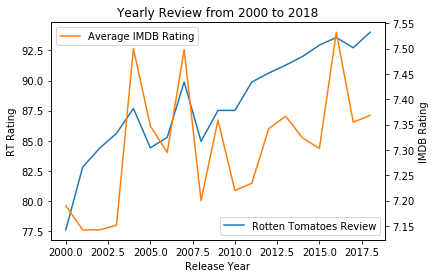

In [199]:
RT_Reviews = df.groupby('Release Year')['Rotten Tomatoes Review'].mean().plot()
RT_Count = df.groupby('Release Year')['Average IMDB Rating'].mean().plot(secondary_y=True)
RT_Reviews.set_title('Yearly Review from 2000 to 2018')
RT_Reviews.set_ylabel('RT Rating')
RT_Count.set_ylabel('IMDB Rating')
RT_Reviews.legend(loc=4)
RT_Count.legend(loc=2)


In [228]:
df['length_of_title'] = df['Title'].map(lambda x: len(x))

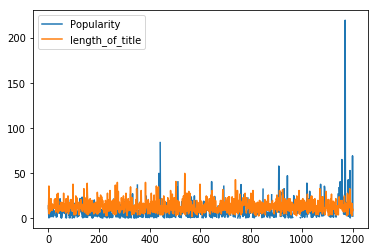

In [235]:
df[['Popularity','length_of_title']].plot()

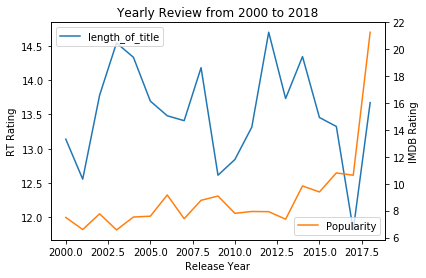

In [236]:
title_length = df.groupby('Release Year')['length_of_title'].mean().plot()
popularity = df.groupby('Release Year')['Popularity'].mean().plot(secondary_y=True)
title_length.set_title('Yearly Review from 2000 to 2018')
title_length.set_ylabel('RT Rating')
popularity.set_ylabel('IMDB Rating')
popularity.legend(loc=4)
title_length.legend(loc=2)

In [176]:
# df.groupby('Release Year')['Rotten Tomatoes Review', 'Number of RT Reviews'].mean().plot()

Text(0, 0.5, 'TMDB Popularity Ratings')

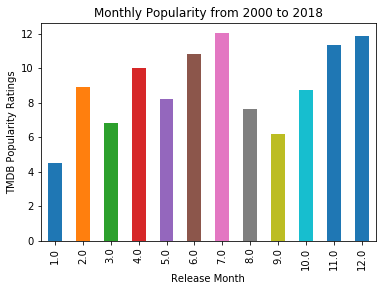

In [81]:
# To get the average user ratings for movies released during the month 
# monthly_popularity = df.groupby('Release Month')['Popularity'].mean().plot(kind = 'bar')
# monthly_popularity.set_title('Monthly Popularity from 2000 to 2018')
# monthly_popularity.set_ylabel('TMDB Popularity Ratings')

In [62]:
df.groupby('Release Year').sum()

,Unnamed: 0,Number of RT Reviews,Average IMDB Rating,Number of IMDB Votes,Popularity,Average TMDB Rating,Number of TMDB Votes,Release Month
Release Year,,,,,,,,
2000.0,131389,6328.0,352.3,7183554.0,397.194,362.4,64111.0,345.0
2001.0,114412,4956.0,185.7,3540291.0,296.799,303.0,39602.0,303.0
2002.0,145916,8151.0,321.4,6234450.0,450.289,386.2,70891.0,371.0
2003.0,175185,7849.0,236.0,3495291.0,341.496,356.4,39776.0,383.0
2004.0,175575,7957.0,292.5,5405223.0,391.291,347.0,50514.0,341.0
2005.0,207400,7810.0,279.2,5967081.0,417.349,362.7,63962.0,333.0
2006.0,199723,7154.0,299.1,5410147.0,476.559,353.1,64654.0,341.0
2007.0,271016,8249.0,344.9,7896792.0,414.540,393.6,76642.0,374.0
2008.0,266763,8165.0,309.6,8739188.0,447.171,347.1,88003.0,293.0
